# Machine Learning

*Лектор: Екатерина Лобачева*

*Факультет экономических наук НИУ ВШЭ, 2017-18 учебный год*

[Страница курса](http://wiki.cs.hse.ru/Машинное_обучение_(факультет_экономических_наук%29)

## Домашнее задание №1
Задание основано на материалах курса [Data analysis (Software Engineering)](http://wiki.cs.hse.ru/Data_analysis_(Software_Engineering%29) (ФКН НИУ ВШЭ).

Вам необходимо анализировать набор данных [adult.data](http://archive.ics.uci.edu/ml/datasets/Adult) (источник: UCI Machine Learning Repository) с помощью Python, pandas, numpy, scipy.

Чтобы выполнить работу, скачайте настоящий ipynb-файл, откройте его в *Jupyter Notebook*, впишите решения в оставленные для этого ячейки (при необходимости можно добавлять новые ячейки), приводя полный работающий код, а также все необходимые пояснения и ответы (для этого нужно использовать markdown-ячейки). Вы можете вставлять формулы с помощью TeX-разметки в markdown-ячейки. После выполнения работы необходимо вытащить ipynb-файл из Jupyter (например, с помощью *File → Download as… → IPython Notebook*).

**Подсказка.** Файл [adult.data](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) является CSV-файлом, но в нём отсутствуют имена переменных — они (вместе с описаниями) приводятся в отдельном файле [adult.names](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). При загрузке датафрейма с помощью `pd.read_csv` используйте параметры `header=None` (чтобы первая строка не воспринималась как строка с именами переменных) и `names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"]`. Чтобы убрать лишние пробелы после запятых, которые есть в файле, следует добавить опцию `skipinitialspace=True`.

## ДЗ №1 4 курс, сложная группа, Самигуллина Юлия

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None, names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace=True)

In [101]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Вопрос 1
Сколько мужчин и женщин в выборке?

In [4]:
df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

### Вопрос 2
Каков средний возраст мужчин?


In [5]:
df[df['sex'] == 'Male']['age'].mean()

39.43354749885268

### Вопрос 3
Какова доля граждан США?

In [9]:
len(df[df['native-country'] == 'United-States'])/len(df)

0.895857006848684

### Вопрос 4
Нарисовать распределение уровня образования в виде столбчатой диаграммы (bar plot).

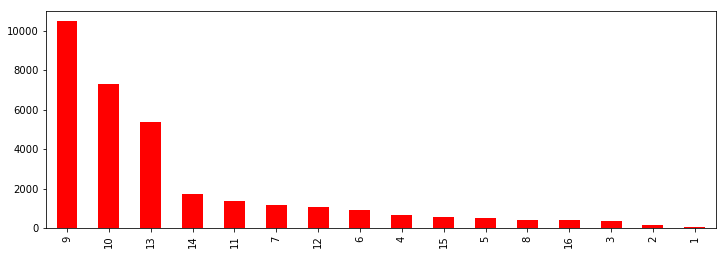

In [28]:
df['education-num'].value_counts().plot(kind='bar', figsize=(12, 4), color = 'r')

### Вопрос 5
Найти среднее и стандартное отклонение переменной "final weight" (fnlwgt) для разведённых людей?

Сначала посмотрим, какие значения принимает переменная семейного положения

In [34]:
df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse', 'Widowed'], dtype=object)

Посчитаем среднее 

In [37]:
df[df['marital-status'] == 'Separated']['fnlwgt'].mean()

206444.32585365855

Посчитаем стандартное отклонение

In [38]:
df[df['marital-status'] == 'Separated']['fnlwgt'].std()

117601.32622938117

### Вопрос 6
Правда ли, что люди, зарабатывающие более 50 тыс. в основном имеют высшее образование?

Ответ на данный вопрос зависит от того, что считать за высшее образование
Я онесу к высшему образованию Doctorate, Masters, Bachelors, Some-college

Выделим подвыборку людей, с зарплатой более 50 тысяч 

In [55]:
df_rich = df[df['50K'] == '>50K']

Далее посчитаем количество людей, которые имеют определенный уровень образования

In [56]:
a = len(df_rich[df_rich['education'] == 'Bachelors'])

In [57]:
b = len(df_rich[df_rich['education'] == 'Masters'])

In [58]:
c = len(df_rich[df_rich['education'] == 'Doctorate'])

In [59]:
d = len(df_rich[df_rich['education'] == 'Some-college'])

Теперь посчитаем долю людей с высшем образованием среди всех людей, зарабатывающих более 50 тысяч

In [60]:
(a+b+c+d)/len(df_rich)

0.6214768524422906

Поскольку полученная доля больше 60%, можно сказать, что данное утверждение верно

### Вопрос 7
Каков максимальный возраст мужчин и женщин каждой расы?

In [72]:
df.groupby(['race','sex'])['age'].max()

race                sex   
Amer-Indian-Eskimo  Female    80
                    Male      82
Asian-Pac-Islander  Female    75
                    Male      90
Black               Female    90
                    Male      90
Other               Female    74
                    Male      77
White               Female    90
                    Male      90
Name: age, dtype: int64

### Вопрос 8
Люди из каких стран работают как фермеры/рыбаки?

Посмотрим, какие профессии присутствуют в выборке

In [95]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

Посмотрим, в каких странах есть люди, работающие рыбаками/фермерами

In [94]:
df[df['occupation'] == 'Farming-fishing']['native-country'].unique()

array(['United-States', 'Cambodia', 'Poland', 'Guatemala', 'Mexico',
       'England', '?', 'Philippines', 'Italy', 'Puerto-Rico', 'Vietnam',
       'Germany', 'Japan', 'Canada', 'Yugoslavia', 'Cuba', 'Portugal',
       'El-Salvador', 'Hong', 'Ireland', 'France'], dtype=object)

### Вопрос 9
Рассмотрим два отношения 1) количество мужчин-бакалавров к количеству мужчин-магистров и 2) количество женщин-бакалавров к количеству женщин-магистров. Какое отношение больше?


In [121]:
df_m = df[df['sex'] == 'Male']

In [124]:
m_bac = len(df_m[df_m['education'] == 'Bachelors'])

In [125]:
m_mas = len(df_m[df_m['education'] == 'Masters'])

In [126]:
m_bac/m_mas

3.14743049705139

In [128]:
df_f = df[df['sex'] == 'Female']

In [129]:
f_bac = len(df_f[df_f['education'] == 'Bachelors'])

In [130]:
f_mas = len(df_f[df_f['education'] == 'Masters'])

In [131]:
f_bac/f_mas

3.0205223880597014

Это отношение у мужчин больше, чем у женщин

### Вопрос 10
Каково максимальное количество рабочих часов в неделю? Как много людей работают столько часов в неделю? Каков их заработок?

In [73]:
df['hours-per-week'].max()

99

Посчитаем число людей, которые работают максимальное число часов в неделю

In [100]:
len(df[df['hours-per-week'] == 99])

85

Выведем уникальные значения переменной зарплаты для людей, работающих максимальное число часов в неделю

In [135]:
df[df['hours-per-week'] == 99]['50K'].unique()

array(['>50K', '<=50K'], dtype=object)